# K means Clustering and PCA

---
## Table of contents

* [K-Means clustering](#kmean)
     - [Introduction](#introduction1)
     - [Understanding the K-Means Algorithm](#algorithm)
     
* [Principal Component Analysis (PCA)](#pca)
     - [Introduction](#introduction)
     - [How PCA works](#work)
     - [Mean centering](#mean)
     - [The first principal component](#first)
     - [The second principal component](#second)
     - [Two principal components define a model plane](#two)
* [Implement](#implement)
* [Application on Data set](#app)

---
## K- Means Clustering<a class="anchor" id="kmean"></a >

### Introduction<a class="anchor" id="introduction1"></a >

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. These traits make implementing k-means clustering in Python reasonably straightforward, even for novice programmers and data scientists.

### Understanding the K-Means Algorithm<a class="anchor" id="algorithm"></a >
Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid. Here’s what the conventional version of the k-means algorithm looks like:
![image](https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png)

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

The figure below shows the centroids and SSE updating through the first five iterations from two different runs of the k-means algorithm on the same dataset:
![image](https://files.realpython.com/media/centroids_iterations.247379590275.gif)

## Principal Component Analysis (PCA)<a class="anchor" id="pca"></a >

### Introduction<a class="anchor" id="introduction"></a >

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed. The underlying data can be measurements describing properties of production samples, chemical compounds or reactions, process time points of a continuous process, batches from a batch process, biological individuals or trials of a DOE-protocol

### How PCA works<a class="anchor" id="work"></a >

In a previous article, we explained why pre-treating data for PCA is necessary. Now, let’s take a look at how PCA works, using a geometrical approach.

Consider a matrix X with N rows (aka "observations") and K columns (aka "variables"). For this matrix, we construct a variable space with as many dimensions as there are variables (see figure below). Each variable represents one coordinate axis. For each variable, the length has been standardized according to a scaling criterion, normally by scaling to unit variance. You can find more details on scaling to unit variance in the previous blog post.
![image](https://www.sartorius.com/resource/image/545524/16x9/1050/590/84ec84f49de3f1756ecdaf5c27be8b4/036D82B5AD533FC92C80102BE6AA83EB/blog-photo-b24-3-unit-variance-en-b-00367-sartorius.jpg)
In the next step, each observation (row) of the X-matrix is placed in the K-dimensional variable space. Consequently, the rows in the data table form a swarm of points in this space.
![image](https://www.sartorius.com/resource/image/545526/16x9/1050/590/c4a6ad647ef3ad2bc5195a90d1d3378f/9B18DA18F3C200EDA6B206388E586F49/blog-photo-b24-4-figure-3-en-b-00368-sartorius.jpg)

### Mean centering<a class="anchor" id="mean"></a >

Next, mean-centering involves the subtraction of the variable averages from the data. The vector of averages corresponds to a point in the K-space.
n the mean-centering procedure, you first compute the variable averages.
The subtraction of the averages from the data corresponds to a re-positioning of the coordinate system.
The mean-centering procedure corresponds to moving the origin of the coordinate system to coincide with the average point.

### The first principal component<a class="anchor" id="first"></a >

After mean-centering and scaling to unit variance, the data set is ready for computation of the first summary index, the first principal component (PC1). This component is the line in the K-dimensional variable space that best approximates the data in the least squares sense. This line goes through the average point. Each observation (yellow dot) may now be projected onto this line in order to get a coordinate value along the PC-line. This new coordinate value is also known as the score.

### The second principal component<a class="anchor" id="second"></a >

Usually, one summary index or principal component is insufficient to model the systematic variation of a data set. Thus, a second summary index – a second principal component (PC2) – is calculated. The second PC is also represented by a line in the K-dimensional variable space, which is orthogonal to the first PC. This line also passes through the average point, and improves the approximation of the X-data as much as possible.

### Two principal components define a model plane<a class="anchor" id="two"></a >

When two principal components have been derived, they together define a place, a window into the K-dimensional variable space. By projecting all the observations onto the low-dimensional sub-space and plotting the results, it is possible to visualize the structure of the investigated data set. The coordinate values of the observations on this plane are called scores, and hence the plotting of such a projected configuration is known as a score plot.
![image](https://www.sartorius.com/resource/image/545538/16x9/1050/590/415d395f62fe4420905968a153169e5b/CA03A9061E9EE372EB9E086E9B980AD0/blog-photo-b24-9-figure-8-en-b-00373-sartorius.jpg)

## Implement<a class="anchor" id="implement"></a >

In the following notebook, I will implement the K Means Clustering for species classification using the [Penguin dataset](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris). Besides building the K means clustering algorithm, I will also use Principal Component Analysis (PCA) to reduce the dimensions of the dataset, and compare the performance of the K means clustering algorithm before and after PCA.

## Application on Data set<a class="anchor" id="app"></a >


In [2]:
# Import the necessaty libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Remove the rows with NaN values from the dataset
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna(how = "any")
df.drop("Unnamed: 0", axis = 1, inplace = True)

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
df.shape

(333, 7)

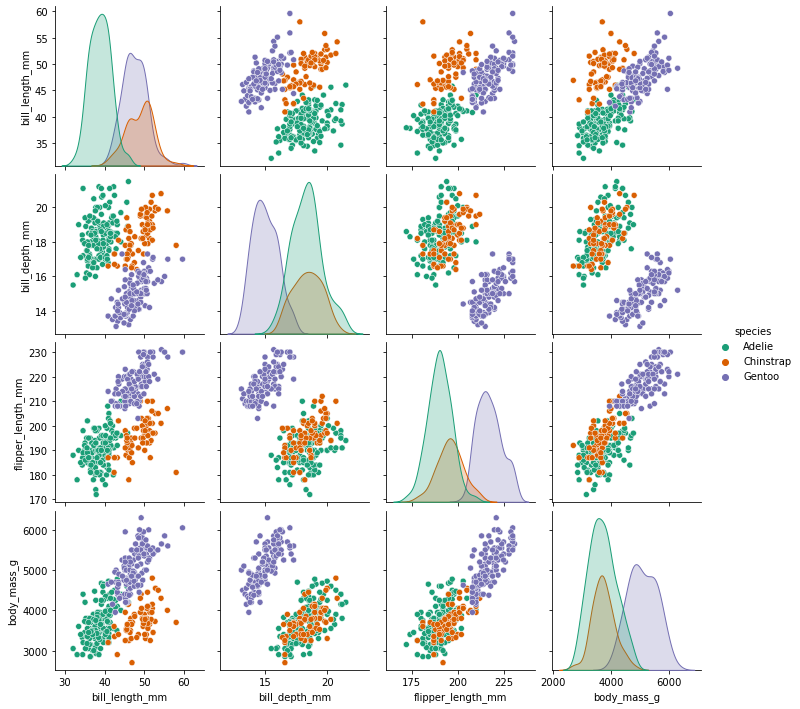

In [4]:
# Plot the scatterplot for each pair of features
sns.pairplot(df, hue='species', palette='Dark2')

In [6]:
# Extract out the features, and convert to numpy array
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [8]:
# Extract out labels, and convert to numpy array
y = df[['species']].to_numpy()

# Change labels to numeric labels
for i, label in enumerate(y):
    if label == "Adelie":
        y[i] = 0
    elif label == "Chinstrap":
        y[i] = 1
    else:
        y[i] = 2

Text(0.5, 1.0, 'Flipper length vs. Body Mass (Before PCA)')

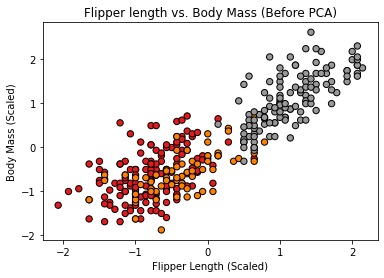

In [13]:
plt.scatter(X[:, 2], X[:, 3], c=y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.xlabel('Flipper Length (Scaled)')
plt.ylabel('Body Mass (Scaled)')
plt.title("Flipper length vs. Body Mass (Before PCA)")

Text(0.5, 1.0, 'Penguins Features After PCA')

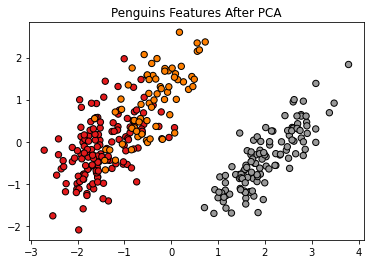

In [14]:
# Use PCA to reduce the dimension of the dataset to only 2 dimentions
X_reduced = PCA(n_components = 2).fit_transform(X)
# Plot the features after PCA
plt.scatter(X_reduced[:, 0],
            X_reduced[:, 1],
            c = y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.title("Penguins Features After PCA")

 It seems the overlapped area decreases, we think this method have better separation after PCA.

## K Means Clustering

In [19]:
k = 2
C = []
for _ in range(k):
    i = np.random.randint(len(X))
    C.append(X[i, :])

In [20]:
def distance(v, w):
    return np.sqrt((v - w) @ (v - w))

In [21]:
distance(C[0], X[0])

1.081031291133399

In [22]:
# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

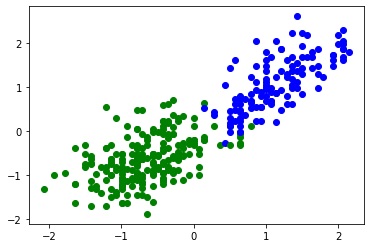

In [25]:
# Scatter plot to show the assignments
for x in X:
    
    # Mark the points assigned to the first cluster in blue
    if assignment(x, C) == 0:
        plt.scatter(x[2], x[3], color = "green")
        
    # Mark the points assigned to the second cluster in red
    else:
        plt.scatter(x[2], x[3], color = "blue")
        
plt.show()

In [27]:
# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    
    # Make the lists for every centroid separately
    for i in range(len(Centroids)):
        A[i] = []
    
    # Assigned every data points to the class list
    for x in data:
        A[assignment(x, Centroids)].append(x)
        
    return A
# Check the functions
A = make_classes(X, C)
A[0][:5]

[array([-0.89604189,  0.7807321 , -1.42675157, -0.56847478]),
 array([-0.82278787,  0.11958397, -1.06947358, -0.50628618]),
 array([-0.67627982,  0.42472926, -0.42637319, -1.1903608 ]),
 array([-1.33556603,  1.0858774 , -0.56928439, -0.94160639]),
 array([-0.85941488,  1.74702554, -0.78365118, -0.69285199])]

In [28]:
# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    
    # Calculate the mean points for every class
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))
        
    return new_Centroids

In [29]:
new_C = new_centroids(X, C)

In [30]:
C

[array([-0.96929591,  0.93330475, -0.42637319, -0.94160639]),
 array([ 1.06350323, -0.18556133,  2.07457274,  1.85688067])]

In [31]:
new_C

[array([-0.40330492,  0.5737035 , -0.65489629, -0.62596991]),
 array([ 0.70661689, -1.00516646,  1.14742159,  1.09674066])]

In [32]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 2):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

In [33]:
# Set K=3 and Try 4 iterations
k = 3
C0 = initialize_centroids(X, k = k)
C1 = new_centroids(X, C0)
C2 = new_centroids(X, C1)
C3 = new_centroids(X, C2)

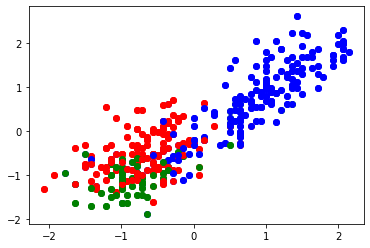

In [34]:

for x in X:
    if assignment(x, C0) == 0:
        plt.scatter(x[2], x[3], color = "orange")
    elif assignment(x, C0) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "pink")

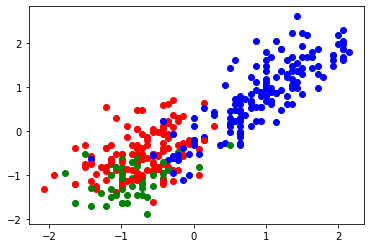

In [35]:
for x in X:
    if assignment(x, C1) == 0:
        plt.scatter(x[2], x[3], color = "orange")
    elif assignment(x, C1) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "pink")

In [45]:
for x in X:
    if assignment(x, C2) == 0:
        plt.scatter(x[2], x[3], color = "orange")
    elif assignment(x, C2) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "pink")

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

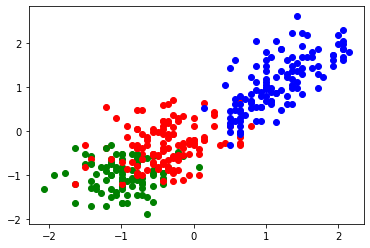

In [37]:
for x in X:
    if assignment(x, C3) == 0:
        plt.scatter(x[2], x[3], color = "orange")
    elif assignment(x, C3) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "pink")

In [39]:
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1
        
    return C_new
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)
def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new

def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

Text(0.5, 1.0, 'K Values vs. MSE')

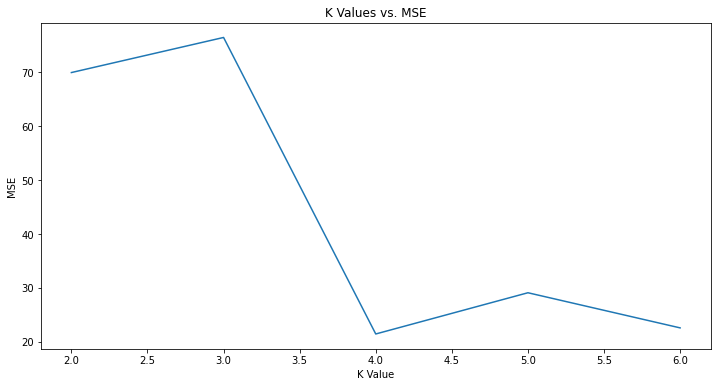

In [40]:
C1 = fit(X, k = 1)
C2 = fit(X, k = 2)
C3 = fit(X, k = 3)
C4 = fit(X, k = 4)
C5 = fit(X, k = 5)
C6 = fit(X, k = 6)
C = [C2, C3, C4, C5, C6]
errors = [mse_classes(X, centroids) for centroids in C]
plt.figure(figsize=(12, 6))
plt.plot([i for i in range(2, 7)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

## Implement K Means Clustering after PCA


In [43]:

def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X_reduced))
        Centroids.append(X_reduced[i, :])
    return Centroids

def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X_reduced, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new


def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
    return sum(x for x in errors)

C1 = fit(X_reduced, k = 1)
C2 = fit(X_reduced, k = 2)
C3 = fit(X_reduced, k = 3)
C4 = fit(X_reduced, k = 4)
C5 = fit(X_reduced, k = 5)
C6 = fit(X_reduced, k = 6)
C7 = fit(X_reduced, k = 7)
C8 = fit(X_reduced, k = 8)

C = [C2, C3, C4, C5, C6, C7, C8]

Text(0.5, 1.0, 'K Values vs. MSE')

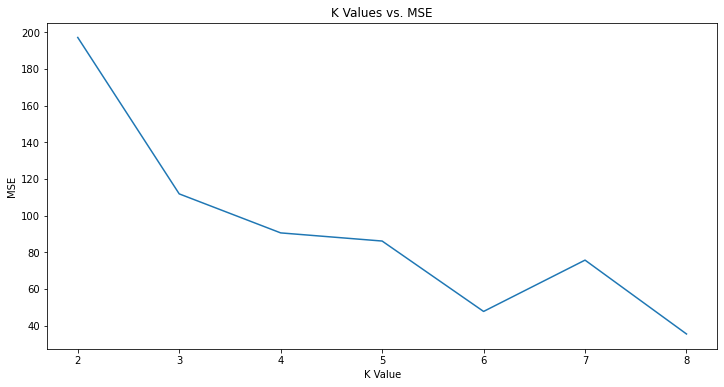

In [44]:
# Plot the loss function with K values
errors = [mse_classes(X_reduced, centroids) for centroids in C]
plt.figure(figsize=(12, 6))
plt.plot([i for i in range(2, 9)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

Conclusion:
After PCA, the K=6 is the elbow point, which is also consistent to the original number of the labels in the Penguins dataset.